<a href="https://colab.research.google.com/github/muhamadfadil316/EDA/blob/main/TugasEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
file_name = list(uploaded.keys()) [0]
df = pd.read_excel(file_name)

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Tampilkan beberapa baris pertama DataFrame untuk memastikan data berhasil dimuat
display(df.head())

Saving salary.xlsx to salary (1).xlsx


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif, median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()

median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary
count,6707.000000,6705.000000,6.703000e+03
mean,33.623677,8.096346,1.154461e+05
std,7.621529,6.067248,5.388179e+04
min,21.000000,0.000000,3.500000e+02
25%,28.000000,3.000000,7.000000e+04
50%,32.000000,7.000000,1.150000e+05
75%,38.000000,12.000000,1.600000e+05
max,62.000000,35.000000,1.000000e+06
median,32.000000,7.000000,1.150000e+05
mode,27.000000,2.000000,1.400000e+05


In [ ]:
# Mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran dataset (baris, kolom):", df.shape)

# Mengecek jumlah total elemen dalam dataset
print("Jumlah total elemen:", df.size)

Ukuran dataset (baris, kolom): (6707, 6)
Jumlah total elemen: 40242


In [ ]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, tampilkan beberapa baris duplikat pertama
if duplicate_rows_count > 0:
  print("\nBeberapa baris duplikat pertama:")
  display(df[df.duplicated (keep=False)].head())

Jumlah baris duplikat: 4913

Beberapa baris duplikat pertama:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
141,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
195,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0


In [ ]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

#drop duplikat (missing value)
df = df.drop_duplicates()

#drop missing value
df = df.dropna()

print(f"Ukuran dataset setelah dibersihkan: {df.shape}")

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64
Ukuran dataset setelah dibersihkan: (1787, 6)


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
  print(f"\nKolom: {col}")
  print(df[col].value_counts())\

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      966
Female    814
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    506
Master's Degree      446
PhD                  341
Bachelor's           261
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager             127
Full Stack Engineer                   122
Senior Software Engineer               96
Senior Project Engineer                95
Back end Developer                     81
                                     ... 
Junior Social Media Specialist          1
Senior Product Development Manager      1
Social Media Man                        1
Delivery Driver                         1
Intern                                  1
Name: count, Length: 192, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.155008,9.174314,113693.893117
std,8.235818,6.870419,55711.243473
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

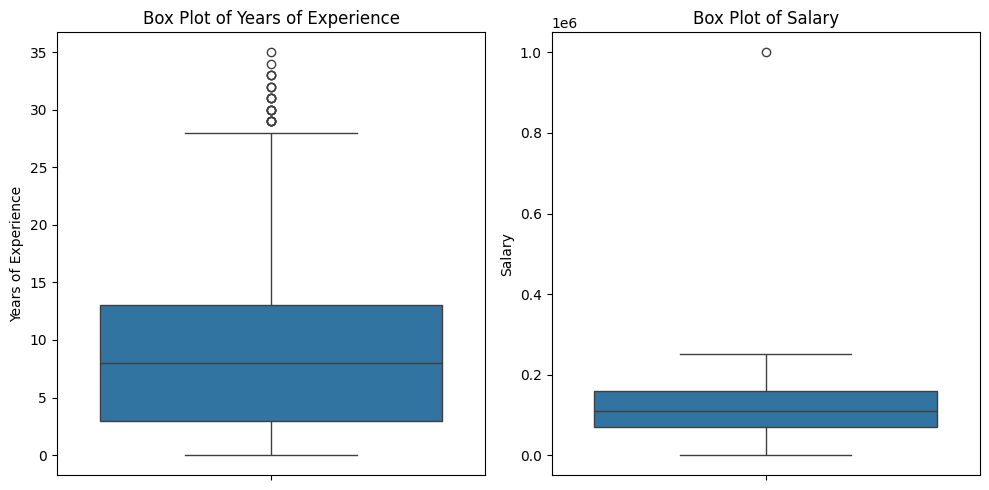

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

numerical_cols_outliners = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliners):
  plt.subplot(1, 2, i + 1)
  sns.boxplot(data=df, y=col)
  plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show

In [ ]:
duplicat_rows_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicat_rows_count}")
if duplicat_rows_count > 0:
  print("\nMenghapus baris duplikat...")
  df = df.drop_duplicates()
  print("Baris duplikat telah dihapus.")
duplicat_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicat_rows_count_after}")
if duplicat_rows_count > 0:
  print("\nBeberapa baris pertama DataFrame setelah penghapusan duplikat:")
  display(df.head())

Jumlah baris duplikat: 0

Jumlah baris duplikat setelah penghapusan: 0


In [ ]:
#menampilkan korelasi antara YOF dan Salary
correlation = df['Years of Experience'].corr(df['Salary'])
print(f"Korelasi antara YOE dan Salary: {correlation}")

Korelasi antara YOE dan Salary: 0.7890086447338328


In [ ]:
#hitung koefisien determinasi (R-squared)
r_squared = correlation**2
print(f"Koefisien determinasi (R-squared) antara YOF dan Salary: {r_squared}")

Koefisien determinasi (R-squared) antara YOF dan Salary: 0.6225346414647196


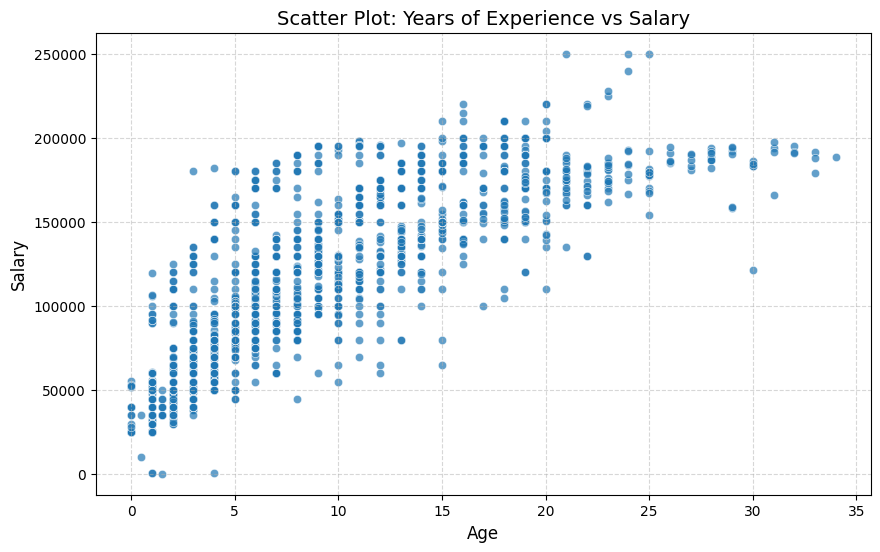

In [ ]:
df = df.dropna(subset=["Years of Experience", "Salary"])
df = df[df["Salary"] < 300000]  # batas wajar (hapus nilai terlalu tinggi seperti >300K)

# Scatter plot: Years of Experience vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Years of Experience", y="Salary", alpha=0.7)

plt.title("Scatter Plot: Years of Experience vs Salary", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
import statsmodels.formula.api as smf

# Hapus data yang kosong dan outlier ekstrem
df = df.dropna(subset=["Salary", "Years of Experience"])
df = df[df["Salary"] < 300000]  # batas wajar

# Reset index
df = df.reset_index(drop=True)
df.index = df.index + 1

# Definisikan model regresi Salary ~ Years of Experience
model_yoe_salary = smf.ols('Q("Salary") ~ Q("Years of Experience")', data=df).fit()

# Ambil koefisien
intercept_yoe_salary = model_yoe_salary.params['Intercept']
yoe_coef_yoe_salary = model_yoe_salary.params['Q("Years of Experience")']

# Ambil nilai SSR dan R²
ssr_yoe_salary = model_yoe_salary.ssr
r2_yoe_salary = model_yoe_salary.rsquared

# Cetak hasil
print(f"Jumlah Kuadrat Residual (SSR) untuk model YOE vs Salary: {ssr_yoe_salary:.4f}")
print(f"Koefisien Determinasi (R²): {r2_yoe_salary:.4f}\n")
print("Persamaan Garis Regresi (Salary vs Years of Experience):")
print(f"Salary_prediksi = {intercept_yoe_salary:.4f} + ({yoe_coef_yoe_salary:.4f}) * Years_of_Experience")

Jumlah Kuadrat Residual (SSR) untuk model YOE vs Salary: 1569851094827.9128
Koefisien Determinasi (R²): 0.6703

Persamaan Garis Regresi (Salary vs Years of Experience):
Salary_prediksi = 56621.7114 + (6175.4310) * Years_of_Experience


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6703.
  res = hypotest_fun_out(*samples, **kwds)


Hasil Uji Shapiro-Wilk: statistik = 0.9373, p-value = 0.0000
Data tidak berdistribusi normal (menolak H0)


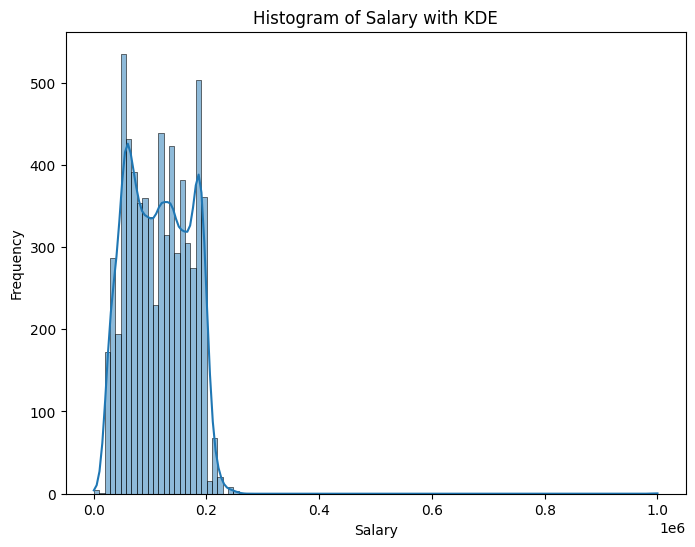

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Baca data
df = pd.read_excel("salary.xlsx")

# Uji normalitas pada kolom Salary
shapiro_test = stats.shapiro(df['Salary'].dropna())
print(f"Hasil Uji Shapiro-Wilk: statistik = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

# Interpretasi hasil
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data kemungkinan berdistribusi normal (gagal menolak H0)")
else:
    print("Data tidak berdistribusi normal (menolak H0)")

# Visualisasi histogram dengan KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'].dropna(), kde=True)
plt.title('Histogram of Salary with KDE')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Kesimpulan dan Rekomendasi

Berdasarkan hasil analisis data mengenai salary terhadap years of experience, diperoleh bahwa terdapat hubungan positif yang kuat antara kedua variabel tersebut. Nilai korelasi dan koefisien determinasi menunjukkan bahwa semakin lama pengalaman kerja seseorang, maka semakin tinggi pula gaji yang diterimanya.

Dengan menggunakan model regresi linier sederhana, diperoleh persamaan regresi sebagai berikut:

Salary = 56647.461242 + 6173.698537308482 × Years of Experience

Hasil ini menunjukkan bahwa setiap penambahan satu tahun pengalaman kerja akan meningkatkan salary rata-rata sebesar kurang lebih 6173.70 satuan.

Dari analisis ini dapat disimpulkan bahwa years of experience merupakan faktor penting dalam menentukan besaran salary. Oleh karena itu, perusahaan disarankan untuk mempertimbangkan pengalaman kerja sebagai salah satu indikator utama dalam penyusunan struktur gaji yang adil dan transparan.

Kesimpulan Akhir:

Secara keseluruhan, model regresi linier sederhana ini mampu menjelaskan hubungan yang signifikan antara years of experience dan salary. Dengan penerapan kebijakan kompensasi yang berbasis pada pengalaman kerja, perusahaan dapat meningkatkan motivasi, kinerja, serta retensi karyawan dalam jangka panjang.